<a href="https://colab.research.google.com/github/Yushan2008/PythonColab/blob/main/Hasil_Pratikum_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving nilai_siswa.csv.csv to nilai_siswa.csv (5).csv
Nama kolom dalam data:
Index(['Nama', 'Matpel', 'Nilai'], dtype='object')


,nama,matpel,nilai
0,Ade,Bahasa Indonesia,87
1,Aira,Bahasa Indonesia,88
2,Badi,Bahasa Inggris,78
3,Cyla,Bahasa Inggris,90
4,Khansa,Matematika,98



--- Statistik Dasar ---
Rata-rata: 86.31818181818181
Median: 86.5
Modus: 85

--- Bahasa Inggris ---
   nama          matpel  nilai
2  Badi  Bahasa Inggris     78
3  Cyla  Bahasa Inggris     90
5  Maya  Bahasa Inggris     85

--- Matematika ---
     nama      matpel  nilai
4  Khansa  Matematika     98
6     Dwi  Matematika     85

--- Bahasa Indonesia ---
     nama            matpel  nilai
0     Ade  Bahasa Indonesia     87
1    Aira  Bahasa Indonesia     88
11   Agus  Bahasa Indonesia     87
12  Gilam  Bahasa Indonesia     75

--- Nilai Maksimum & Minimum per Mapel ---
                  max  min
matpel                    
Bahasa Indonesia   88   75
Bahasa Inggris     90   78
Fisika             95   75
Matematika         98   85
Produktif          90   80


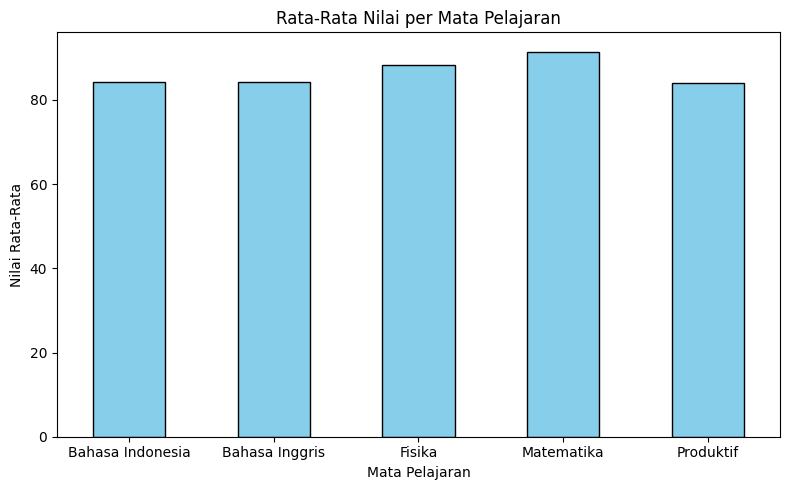

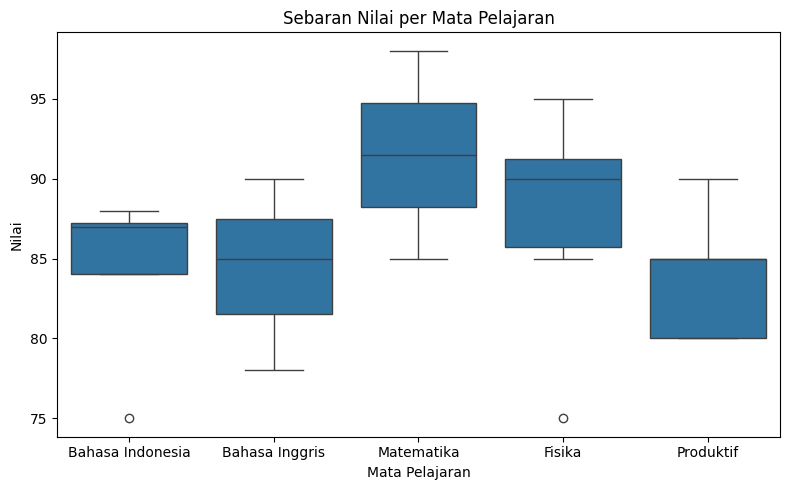

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# === Upload file ===
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# === Baca CSV ===
# Gunakan delimiter ; jika file CSV memakai tanda titik koma
data = pd.read_csv(io.BytesIO(uploaded[filename]), delimiter=';')

# === Cek kolom ===
print("Nama kolom dalam data:")
print(data.columns)

# === Normalisasi nama kolom jadi huruf kecil ===
data.columns = data.columns.str.lower()

# === Pastikan kolom yang dibutuhkan ada ===
if 'matpel' not in data.columns or 'nilai' not in data.columns:
    raise KeyError("Pastikan file CSV kamu punya kolom bernama 'matpel' dan 'nilai'.")

# === Lihat beberapa data awal ===
display(data.head())

# === Statistik dasar ===
print("\n--- Statistik Dasar ---")
print("Rata-rata:", data['nilai'].mean())
print("Median:", data['nilai'].median())
print("Modus:", data['nilai'].mode()[0])

# === Filter data berdasarkan mapel (tanpa peduli huruf besar/kecil) ===
bing = data[data['matpel'].str.lower() == 'bahasa inggris']
matematika = data[data['matpel'].str.lower() == 'matematika']
bindo = data[data['matpel'].str.lower() == 'bahasa indonesia']

print("\n--- Bahasa Inggris ---")
print(bing)
print("\n--- Matematika ---")
print(matematika)
print("\n--- Bahasa Indonesia ---")
print(bindo)

# === Nilai maksimum & minimum per mapel ===
print("\n--- Nilai Maksimum & Minimum per Mapel ---")
print(data.groupby('matpel')['nilai'].agg(['max', 'min']))

# === Rata-rata nilai per mapel ===
rata = data.groupby('matpel')['nilai'].mean()

# === Visualisasi: Bar Chart ===
plt.figure(figsize=(8,5))
bars = rata.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Rata-Rata Nilai per Mata Pelajaran')
plt.xlabel('Mata Pelajaran')
plt.ylabel('Nilai Rata-Rata')

# Label horizontal dan diberi jarak
plt.xticks(rotation=0, ha='center')  # rotasi horizontal
plt.tight_layout()  # atur jarak otomatis agar tidak rapat
plt.show()

# === Visualisasi: Boxplot ===
plt.figure(figsize=(8,5))
sns.boxplot(x='matpel', y='nilai', data=data)
plt.title('Sebaran Nilai per Mata Pelajaran')
plt.xlabel('Mata Pelajaran')
plt.ylabel('Nilai')
plt.xticks(rotation=0, ha='center')  # label horizontal juga di boxplot
plt.tight_layout()
plt.show()